## Non Linear Dimensionality Reduction


In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### ISOMAP and t-SNE
#### a)

In [26]:
df = pd.read_excel("breast-cancer-wisconsin.xlsx")

dF=df.interpolate()
dF

,code,thickness,uniCelS,uniCelShape,marAdh,epiCelSize,bareNuc,blaChroma,normNuc,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


t-SNE with a random initial distribution

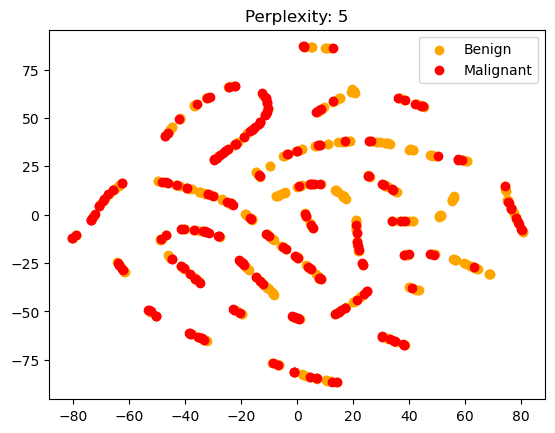

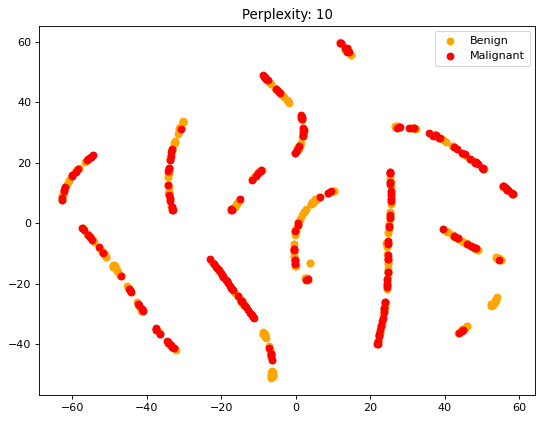

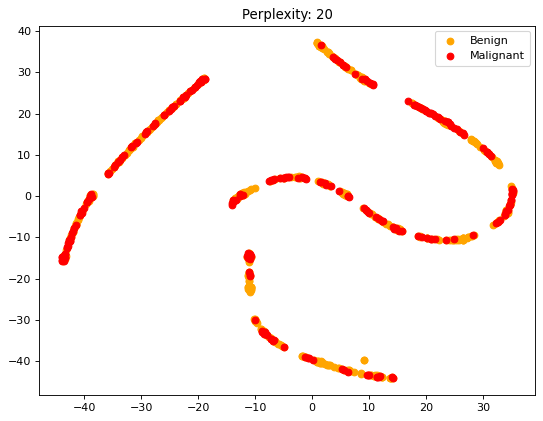

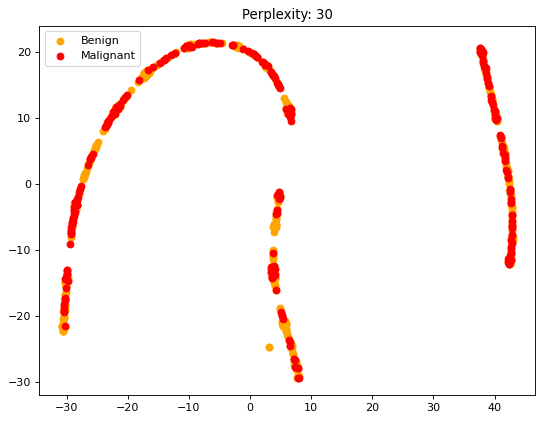

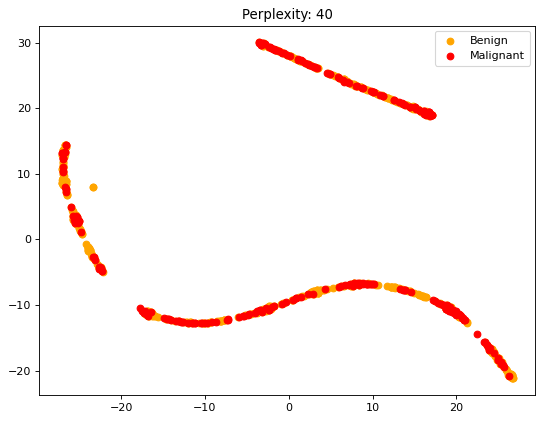

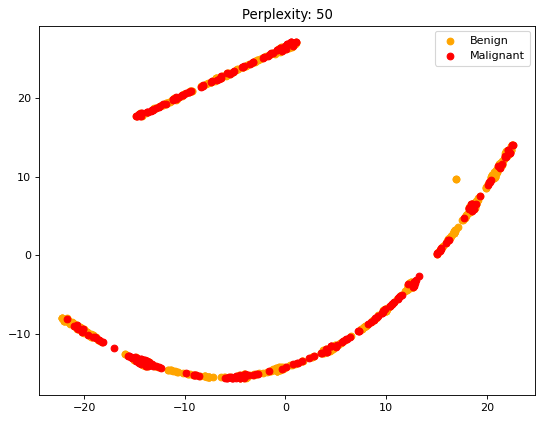

<Figure size 640x480 with 0 Axes>

In [27]:
benign_df = dF[dF['class'] == 2]
malignant_df= dF[dF['class'] == 4]

X = np.concatenate((benign_df.drop('class', axis=1), malignant_df.drop('class', axis=1)), axis=0)
y = np.concatenate((np.zeros(benign_df.shape[0]), np.ones(malignant_df.shape[0])))
perplexities = [5, 10, 20, 30, 40, 50]

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity, init='random')
    Y = tsne.fit_transform(X)
    plt.scatter(Y[y==0, 0], Y[y==0, 1], c='orange', label='Benign')
    plt.scatter(Y[y==1, 0], Y[y==1, 1], c='red', label='Malignant')
    plt.title("Perplexity: {}".format(perplexity))
    plt.legend()
    figure(figsize=(8, 6), dpi=80)
plt.show()

t-SNA with PCA as the initial distribution

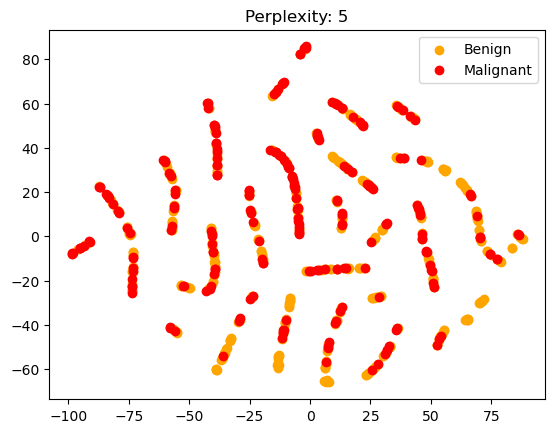

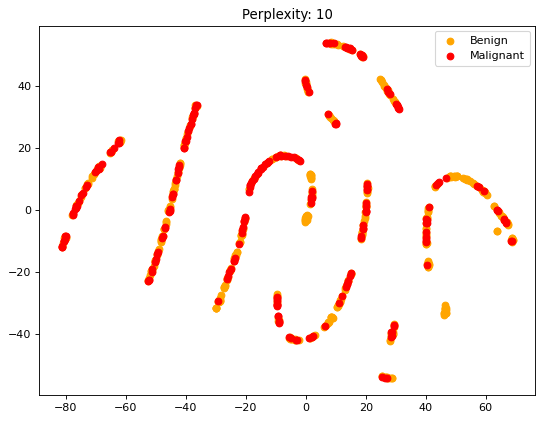

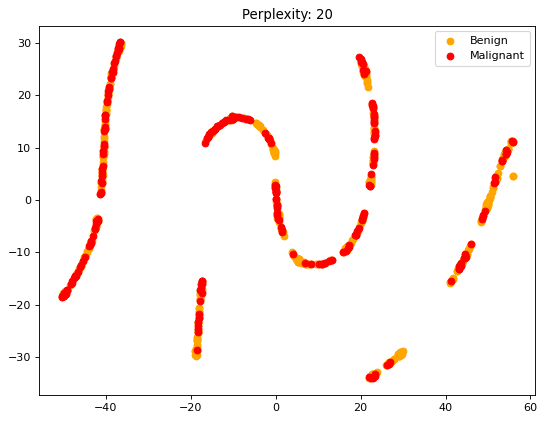

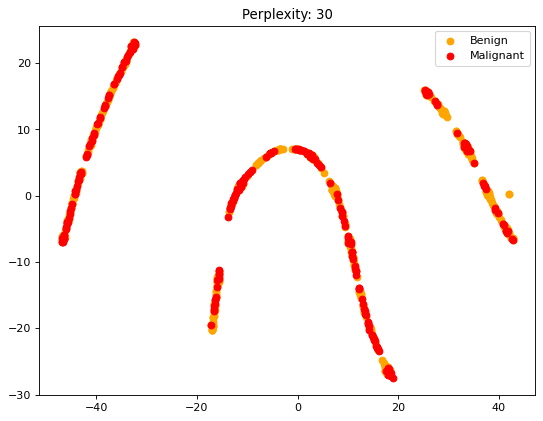

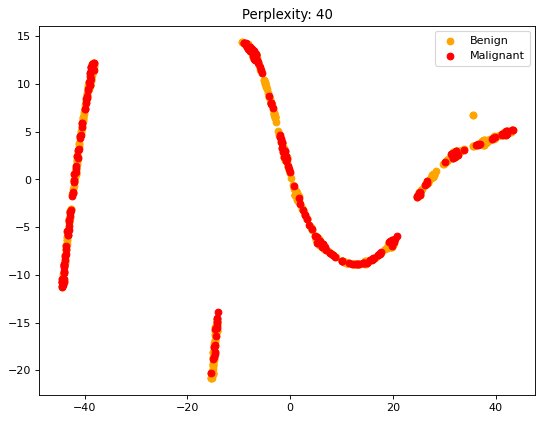

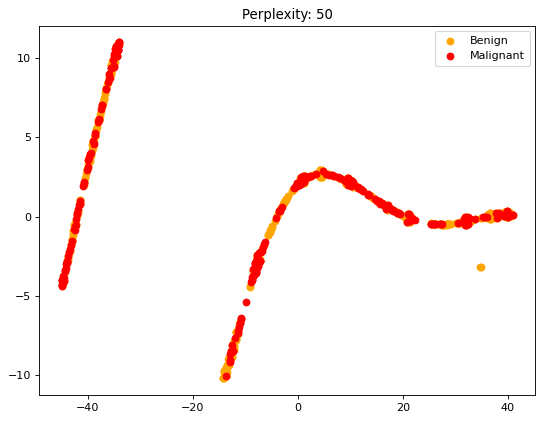

<Figure size 640x480 with 0 Axes>

In [28]:
benign_df = dF[dF['class'] == 2]
malignant_df = dF[dF['class'] == 4]

X = np.concatenate((benign_df.drop('class', axis=1), malignant_df.drop('class', axis=1)), axis=0)
y = np.concatenate((np.zeros(benign_df.shape[0]), np.ones(malignant_df.shape[0])))

perplexities = [5, 10, 20, 30, 40, 50]

for i, perplexity in enumerate(perplexities):

    tsne = TSNE(n_components=2, perplexity=perplexity, init='pca')
    Y = tsne.fit_transform(X)
    plt.scatter(Y[y==0, 0], Y[y==0, 1], c='orange', label='Benign')
    plt.scatter(Y[y==1, 0], Y[y==1, 1], c='red', label='Malignant')
    plt.title("Perplexity: {}".format(perplexity))
    plt.legend()
    figure(figsize=(8, 6), dpi=80)
plt.show()


#### Analysis of both initial distributions

By comparing the diagrams with random initial distribution with pca initial distribution, we can see that the data is overlapping greatly in each cluster. As we increase the value of perplexity, the numbers of individual small clusters start reducing. For the perplexity=50, only two clusters can be observed. The initial distribution didn't matter as we can see that both random and pca initial distribution were able to achieve 2 clear clusters at the perplexity=50. 

### b)

In [32]:
df1=pd.read_excel("Data_Cortex_Nuclear.xls")


In [33]:
df2=df1.interpolate()

In [7]:
print(df2.isnull().sum())

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64


In [34]:
data_filtered = df2.loc[(df2['class'] == 'c-SC-s') | (df2['class'] == 't-SC-s')]
df_fltr= data_filtered.drop(columns=['MouseID', 'class','Behavior','Treatment','Genotype'])
df_fltr

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
435,0.304966,0.477769,0.319786,2.596944,4.447364,0.227196,0.176165,4.218640,0.203972,1.279603,...,0.253098,0.137671,0.132904,0.136876,0.126152,0.418097,0.136876,0.175802,0.179059,0.959882
436,0.298968,0.480565,0.315214,2.626784,4.473428,0.232007,0.175068,4.259338,0.201488,1.329335,...,0.263292,0.142504,0.134201,0.145857,0.142504,0.399409,0.136197,0.181542,0.171803,0.934616
437,0.303297,0.485640,0.321380,2.606443,4.681811,0.228233,0.173986,4.226105,0.208479,1.433825,...,0.249487,0.143534,0.133823,0.153798,0.142271,0.398784,0.138876,0.186010,0.164061,0.870125
438,0.303962,0.454134,0.314818,2.414511,4.004704,0.229781,0.182016,3.950606,0.196309,1.221277,...,0.246382,0.140363,0.135732,0.128497,0.125603,0.399479,0.140942,0.187826,0.177889,1.000482
439,0.302761,0.473041,0.322587,2.527886,4.099685,0.242727,0.180656,4.016491,0.197517,1.299055,...,0.251730,0.150038,0.131296,0.132161,0.142253,0.393406,0.144848,0.197616,0.173395,0.983756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.172645,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.172645,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.172645,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.172645,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


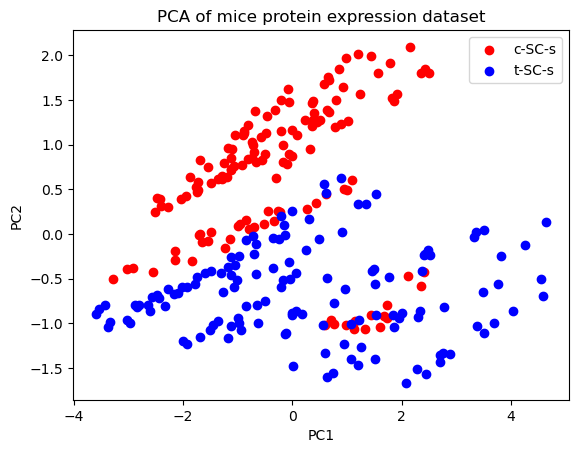

In [35]:
X = df_fltr
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[data_filtered['class'] == 'c-SC-s', 0], X_pca[data_filtered['class'] == 'c-SC-s', 1], c='red', label='c-SC-s')
plt.scatter(X_pca[data_filtered['class'] == 't-SC-s', 0], X_pca[data_filtered['class'] == 't-SC-s', 1], c='blue', label='t-SC-s')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of mice protein expression dataset')
plt.show()

### ISOMAP with different settings

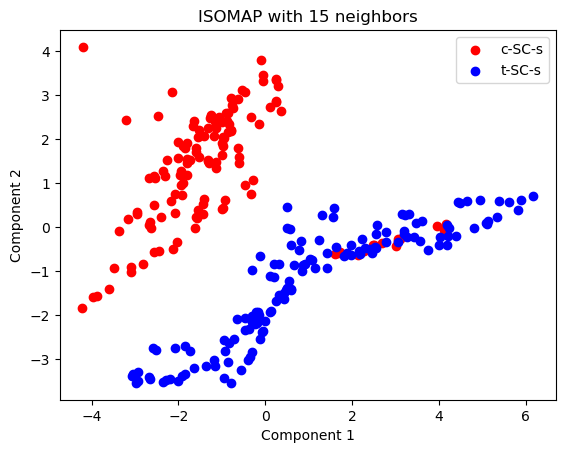

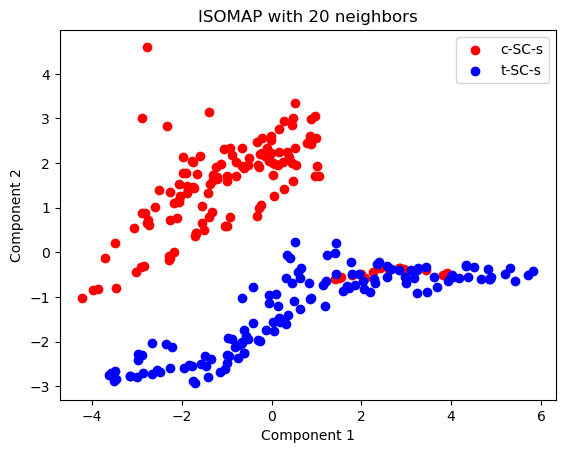

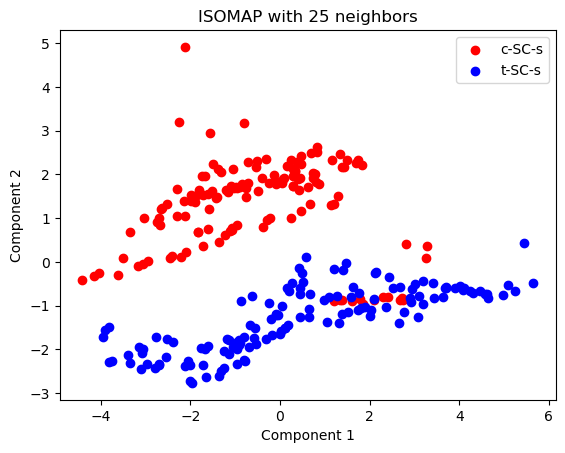

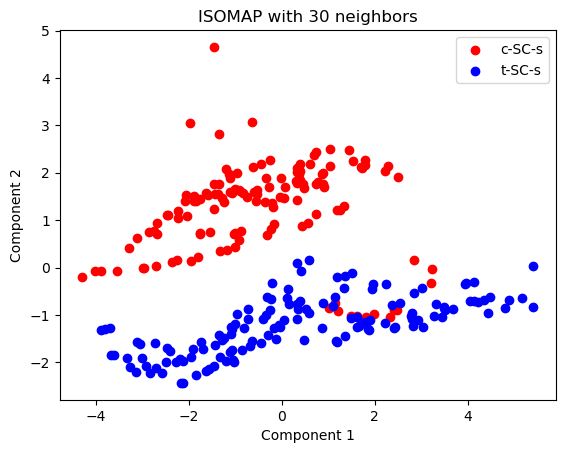

In [36]:
n_neighbors = [ 15, 20, 25, 30]
for n in n_neighbors:
    isomap = Isomap(n_neighbors=n, n_components=2)
    X_isomap = isomap.fit_transform(X)
    plt.scatter(X_isomap[data_filtered['class'] == 'c-SC-s', 0], X_isomap[data_filtered['class'] == 'c-SC-s', 1], c='red', label='c-SC-s')
    plt.scatter(X_isomap[data_filtered['class'] == 't-SC-s', 0], X_isomap[data_filtered['class'] == 't-SC-s', 1], c='blue', label='t-SC-s')
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('ISOMAP with {} neighbors'.format(n))
    plt.show()

### t-SNE with different settings

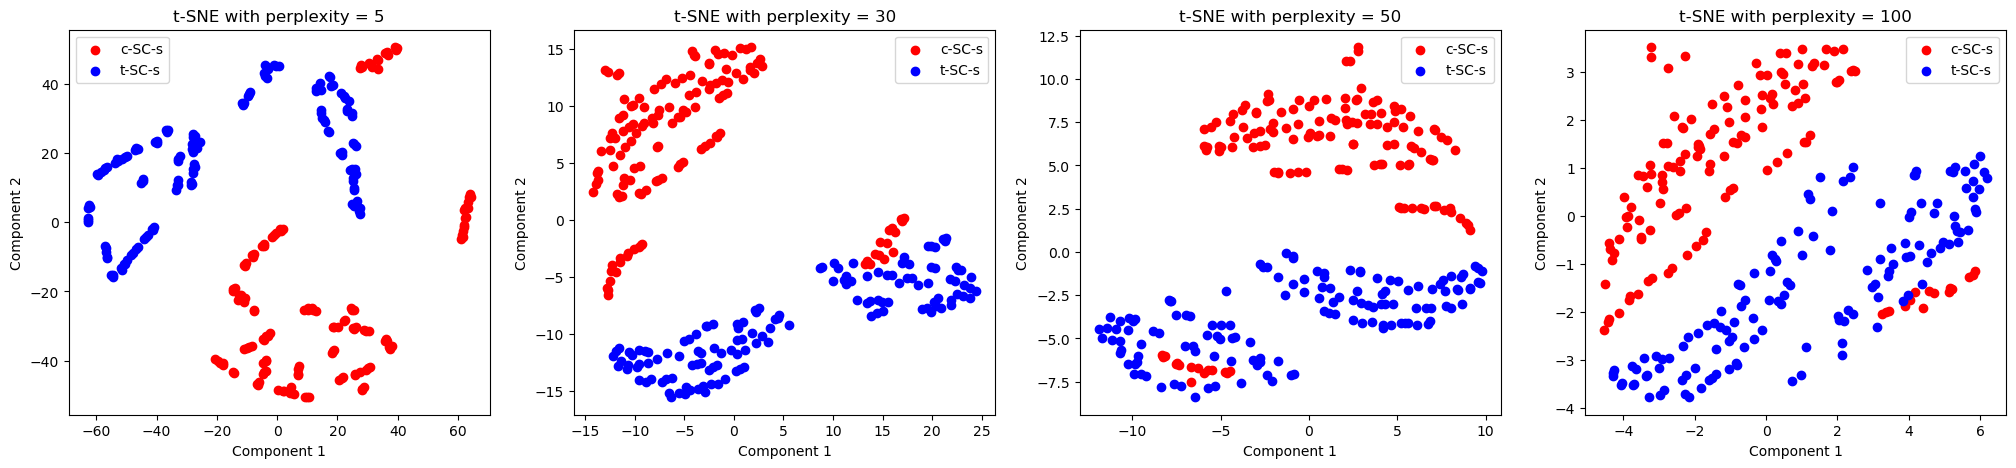

In [37]:
perplexities = [5, 30, 50, 100]
plt.figure(figsize=(25, 5))

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_tsne = tsne.fit_transform(X)
    
    plt.subplot(1, len(perplexities), i+1)
    plt.scatter(X_tsne[data_filtered['class'] == 'c-SC-s', 0], X_tsne[data_filtered['class'] == 'c-SC-s', 1], c='red', label='c-SC-s')
    plt.scatter(X_tsne[data_filtered['class'] == 't-SC-s', 0], X_tsne[data_filtered['class'] == 't-SC-s', 1], c='blue', label='t-SC-s')
    plt.legend()
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('t-SNE with perplexity = {}'.format(perplexity))

plt.show()


#### Yes
The t-SNE help us to separate the groups better than with PCA or ISOMAP.

### Shrinkage in Linear Discriminant Analysis

#### b)

In [38]:
df5=pd.read_csv("LDA-input.csv")
df5

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,class
0,-0.270712,0.104848,0.250528,-0.925200,0.567144,-1.040180,-0.153676,0.789852,-1.226216,-0.948007,C1
1,-0.569654,-0.977150,-0.770632,-0.033711,-1.032859,1.142427,-0.609778,1.469416,1.492679,0.707125,C1
2,-1.858490,-1.370624,-0.330106,-1.515290,1.200060,-1.822619,0.269385,-0.446424,1.114314,-1.380803,C1
3,1.015425,0.224081,-0.644551,0.661532,1.292965,-0.895312,-0.568311,-2.111618,-0.818308,-0.962384,C1
4,5.124502,0.108509,-0.439301,-0.713560,0.934181,0.058656,1.609714,0.859907,-0.985203,-0.958368,C2
5,5.449109,-0.942463,0.158909,0.388076,0.437338,0.418230,-0.732185,-1.428283,-2.009217,-0.233440,C2
6,6.803952,-1.948671,1.367851,-1.858739,-1.233951,-0.507570,1.407171,-0.941097,0.873505,1.135100,C2
7,6.165984,0.049214,0.510947,0.631299,0.887702,0.057652,-0.329544,-2.832079,-1.182554,-0.054846,C2
8,4.248352,6.510343,-0.171336,-0.458055,-1.338782,1.320063,-1.409329,-1.098297,-0.486751,-1.000971,C3
9,4.773877,4.555783,-0.548712,1.080016,-0.752434,1.158795,0.750871,-1.262713,-0.790701,-0.170789,C3


<Axes: >

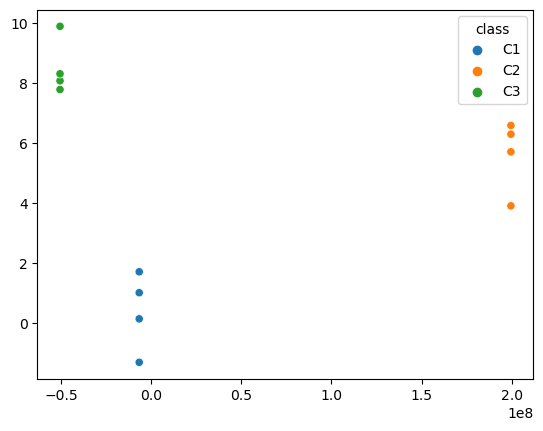

In [39]:
clf = LinearDiscriminantAnalysis(solver='eigen')
x=df5.iloc[:,0:10].values
y=df5.iloc[:,10].values
cclf= clf.fit_transform(x,y)
xs5= cclf[:,0]
ys5= cclf[:,1]
sns.scatterplot(data=df5, x=xs5,y=ys5, hue="class")

### c)

<Axes: >

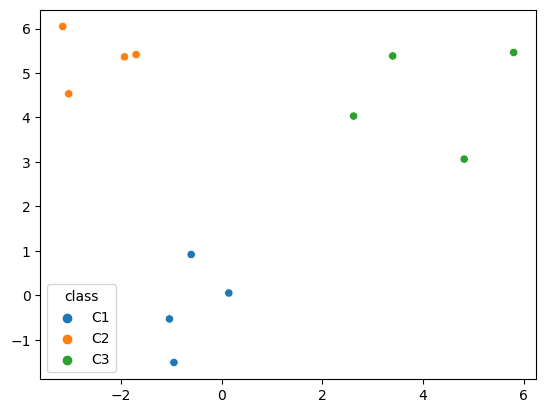

In [40]:
clf2 = LinearDiscriminantAnalysis(solver='eigen',shrinkage='auto')
cclf2= clf2.fit_transform(x,y)
xs52= cclf2[:,0]
ys52= cclf2[:,1]
sns.scatterplot(data=df5, x=xs52,y=ys52, hue="class")

We prefer this graph over before one as the sample covariance matrix was estimated poorly before as the graph features small number of samples. So, we can see that after using shrinkage parameter, it improves the Graph.

### Pitfalls in t-SNE

#### a)

First we executed the t-SNE with three clusters each conating equal number of point. with 10 points per class, dimension = 50 and perplexity = 29.
we obseserved that clusters were separated from each other but overlapping within eachother(inside clusters).
then we run it with perplexity = 30.
here we observed that the clusters were not much separated from eachother and also were not overlapping within eachother.

the reason of this big difference is because the lower values of perplexity controls the structure within clusters while the higher values of perplexity controls the structure between clusters.

we observed perplexity to be directly propotional to points per clusters, as when we increased the points per cluster from 10 to 11 with perplexity = 30, we obtained clusters separated from eachother but overlapping within eachother again.


#### b)

it is beacuse the points that are near the boundry could be local to each other in the higher dimension and when t-SNE mapps them into 2D it is trying to preserve both local and global structure of data. so, the points that are local to each other in higher dimension, appear closer in 2D square.

#### c)

The Square grid is breaking into smaller clusters because when perplexity is set to 2, t-SNE is focusing on perserving the small number of nearby points and is not able to preserve the overall global structure. thus, it is forming small clusters while breaking the grid.

#### d)

From perplexity value from 7 to onwards the resulting visualization start resembling the input data set. and for this we have tried 7 perplexity multiple times just to be sure. it gave use same visualization as input data set. any lower then 7 the circle get deshaped.
larger the perplexity, the more global information or structure will be preserved in the dimensionality reduction. and for different data sets value of perplexity can vary.